# Midterm code starter
In this notebook, we will pull features out of the Kaggle version of the titanic data set.  We separate by sex and do a sample plot.

You can modify the plot as you see fit.

## Pull in the data
Read the train.csv data set into `df` and then display the first 10 instances

Later code is expecting to find the data frame in the variable df, so make sure that is what you use throughout.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Get basic information on the features
Use hist() to look at the distribution of the features

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

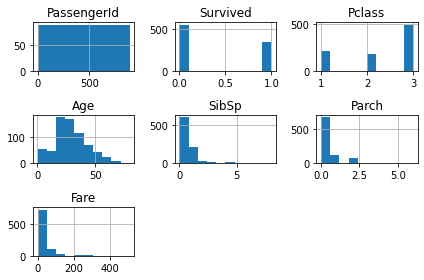

In [2]:
# Question 1A code  [Answer]
from matplotlib import pyplot as plt
plt.rcParams["figure.autolayout"] = True
df.hist()


array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>]], dtype=object)

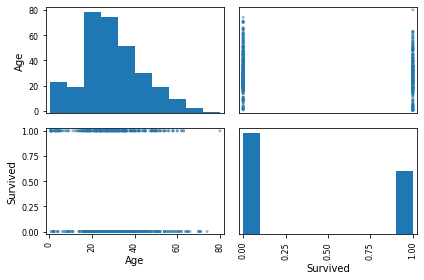

In [3]:
# Scatter plot age vs survival

from pandas.plotting import  scatter_matrix

attributes = ['Age', 'Survived']
scatter_matrix(df[attributes], alpha=.5)

array([[<AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Survived', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>]], dtype=object)

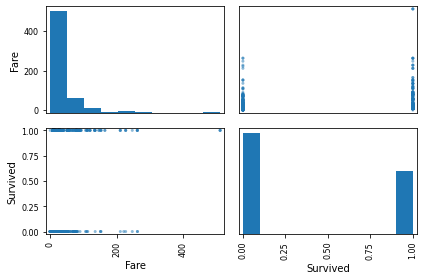

In [4]:
from pandas.plotting import  scatter_matrix

attributes = ['Fare', 'Survived']
scatter_matrix(df[attributes], alpha=.5)

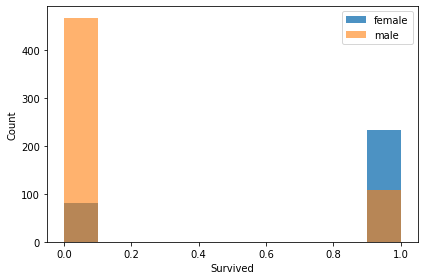

In [5]:
from matplotlib import pyplot as plt

female = df[df['Sex'] == 'female']
male = df[df['Sex'] == 'male']

plt.hist(female['Survived'], label='female', alpha=.8)
plt.hist(male['Survived'], label='male', alpha=.6)
plt.legend()
plt.xlabel('Survived')
plt.ylabel('Count')

plt.show()

#### Fix missing values for age
Replace missing values for age with the average (mean).  Do the operation in place.

In [6]:
mean_value = df['Age'].mean()
print(mean_value)

df['Age'].fillna(value=mean_value, inplace=True)

29.69911764705882


In [13]:
# check that cleaning is good (You don't need to add anything here, but you may)
# df.head(10)
print('# of NaN in Age column = ', df['Age'].isna().sum())

# of NaN in Age column =  0


### Decision Tree classifier

I choosed the features for you!

In [8]:
X = df[['Age', 'Fare']]
y = df['Survived']


Build and train a decision tree classifier
Print the confusion matrix and scores for the trained model

Use the variable y_predicted to determine the performance of the model.  The graphing code below needs to have it defined in order to work correctly.

In [11]:
# Question 3e, 3f, 3g code  [Answer]

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_predicted = tree_model.predict(X)
print('Results for decision tree on training data')
print('   Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is   ', accuracy_score(y, y_pred))
print('Precision is  ', precision_score(y, y_pred))
print('Recall is     ', recall_score(y, y_pred))
print('F1 is         ', f1_score(y, y_pred))

Results for decision tree on training data
   Default settings
Confusion Matrix
[[543   6]
 [ 39 303]]
Accuracy is    0.9494949494949495
Precision is   0.9805825242718447
Recall is      0.8859649122807017
F1 is          0.9308755760368664


### Graph for age vs survival, male/female splits

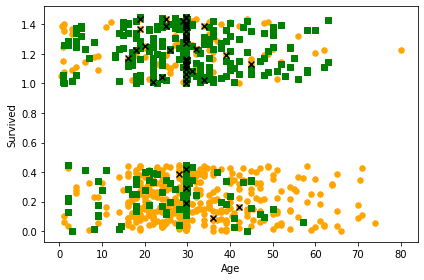

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Differentiate on sex
male = (df["Sex"] == "male")
female = (df["Sex"] == "female")


# Get prediction status from the model
correct = (y - y_predicted) == 0   # true/false if a match
correctM = correct[male]
correctF = correct[female]

#Pull out the features for plotting

# Continuous features, so just use directly
ageM = df[male]["Age"]
ageF = df[female]["Age"]

fareM =df[male]["Fare"]
fareF =df[female]["Fare"]

numberMales = len(ageM)
numberFemales = len(ageF)

# Discrete categoies, so smear the values out by a random amount
smear = 0.45

pclassM = df[male]["Pclass"]
pclassM += np.random.random(numberMales)*smear
pclassF = df[female]["Pclass"]
pclassF += np.random.random(numberFemales)*smear

survivedM = df[male]["Survived"]
survivedM += np.random.random(numberMales)*smear
survivedF = df[female]["Survived"] 
survivedF += np.random.random(numberFemales)*smear

sibspM = df[male]["SibSp"]
sibspM += np.random.random(numberMales)*smear
sibspF = df[female]["SibSp"] 
sibspF += np.random.random(numberFemales)*smear

parchM = df[male]["Parch"]
parchM += np.random.random(numberMales)*smear
parchF = df[female]["Parch"] 
parchF += np.random.random(numberFemales)*smear

# Do the plot of age vs survival
plt.xlabel("Age")
plt.ylabel("Survived")

# Scatter plot Male then Female.  (Can reorder if wanted.)
plt.scatter(x=ageM, y=survivedM, marker="o", c="orange", s=30) 
plt.scatter(x=ageF, y=survivedF, marker="s", c="green", s=30) 

#Just mark the ones that are incorrect with X's
#Can comment these two lines out, not critical for the midterm 
plt.scatter(x=ageM[~correctM], y=survivedM[~correctM], marker="x", c="black") 
plt.scatter(x=ageF[~correctF], y=survivedF[~correctF], marker="x", c="black") 

plt.show()
